<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 1:</span> Exploratory Analysis</h1>
<hr>

the goal is to "get to know" the data. 
* Try to learn as much about the data as possible, but don't invest too much time and get stuck on this step.
* You'll probably need to do ad-hoc data exploration later anyway, so you don't need to be 100% comprehensive right now.

Exploratory analysis for machine learning should be **quick, efficient, and decisive**.


**The essential exploratory analysis steps:**
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Advanced segmentations](#advanced-segmentations)

In [1]:
# import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load employee data from CSV
dataset = pd.read_csv('project_files/employee_data.csv')

time to explore the data

# 1. Basic information

The purpose is not to perform rigorous analysis. Instead, it's to get a **qualitative "feel"** for the dataset.

In short, ask the important questions, then look for answers.

- How many observations do we have?
- How many features do we have?
- Is one of those features a target variable?

In [11]:
# Dataframe dimensions
dataset.shape

(14249, 10)

* Which are the **numeric** features?
* Which are the **categorical** features?
* Do any of the data types look suspicious/possibly incorrect? 
    - i.e. numeric features that should be categorical or vice-versa

In [8]:
# Column datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
status               14249 non-null object
tenure               14068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


- Do all the columns make sense?
- Do the values in those columns make sense?
- Does missing data look like it might be a big problem? (with eyeball test)
- What types of classes are there for the categorical features?

In [13]:
# First 10 rows of data
dataset.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


Notes: 
- file complaint NaN's can seen as negatives (0's)
- recently promoted NaN's could also possibly be negatives (0's).
- perhaps salary should be a float, not a subjective categorical

**Display the last 10 rows of data to check for any signs of <span style="color:royalblue">corrupted data</span>.**

In [14]:
# Last 10 rows of data
dataset.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


# 2. Distributions of numeric features

One of the best data exploration tasks is plotting the distributions of your features.

- Are there any distributions that don't make sense?
- Does it look like there are potential outliers that don't make sense?
- Are there any indicator variables that don't make sense?
- Are there any boundaries that don't make sense?

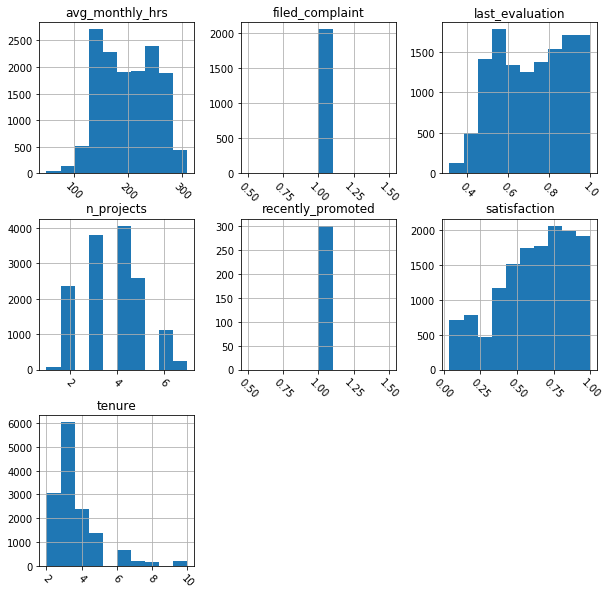

In [18]:
# Plot histogram grid
dataset.hist(figsize=(10,10), xrot=-45)
# Clear "residue"
%clear

Note: there are no 0 values for our two categorical variables 'recently_promoted' and 'filed_complaint'
 - adds to hypothesis that NaN's are negative that is 0's

In [19]:
# Summarize numerical features
dataset.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


<span id="categorical"></span>
# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.
<br>
**First, display the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.**

In [20]:
# Summarize categorical features
dataset.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


**Using a loop, display <span style="color:royalblue">bar plots</span> for each of the categorical features.**

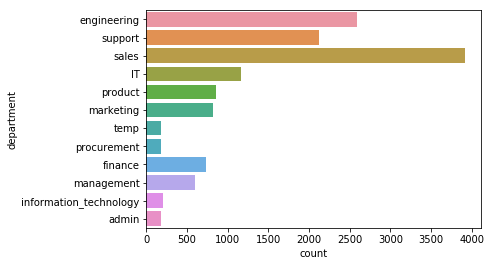

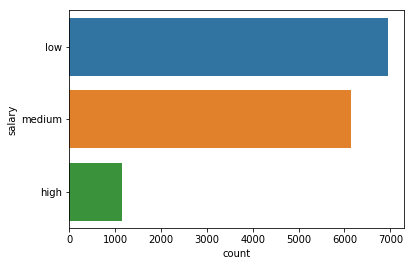

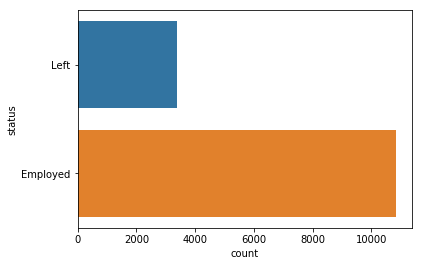

In [22]:
# Plot bar plot for each categorical feature
for category in dataset.dtypes[dataset.dtypes=='object'].index:
    sns.countplot(y=category, data=dataset)
    plt.show()

Questions to consider:
- How many unique classes does it have?
- What is the most frequent class?
- How many observations belong to the most frequent class?
- Does it have any missing values?

# 4. Segmentations

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

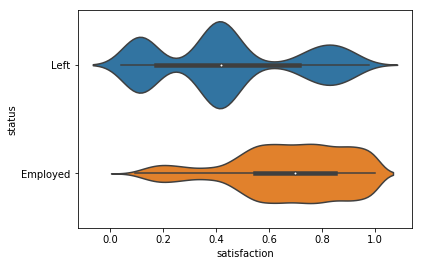

In [27]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='status', x='satisfaction', data=dataset)

Plot makes sense. Unsatisified and very unsatisfied employees have left, some top one have also left (what reason?)
Majority of those still employed feel moderatly satisified (0.5 and greater).
**Next, display a violin plot that segments <code style="color:steelblue">'last_evaluation'</code> by <code style="color:steelblue">'status'</code>.**

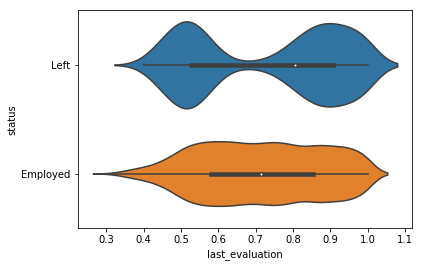

In [28]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(x='last_evaluation', y='status', data=dataset)

Interesting. Even those who had a really high last evaluation rating still left- could they have been the excellent employees that were poached or sought better horizons?

In [29]:
# Segment by status and display the means within each class
dataset.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


Two notable differences: The employees that left had lower satisfaction levels (naturally), but also had higher tenure. Interesting - didnt see their long term future in the company?
- as well from distribution we saw that very few current employees had tenure beyond 6 years.

# 5. Advanced segmentations

Because our target variable (left vs. employed) is categorical, it can be helpful to expand our segmentation analysis. 

<br>
**bivariate segmentations, which can be produced with the <code style="color:steelblue">sns.lmplot()</code> 
* <code style="color:steelblue">sns.lmplot()</code>- which is essentially a regular **scatterplot** with additional options.
* Using hue argument, we can color each point based on its <code style="color:steelblue">'status'</code>.


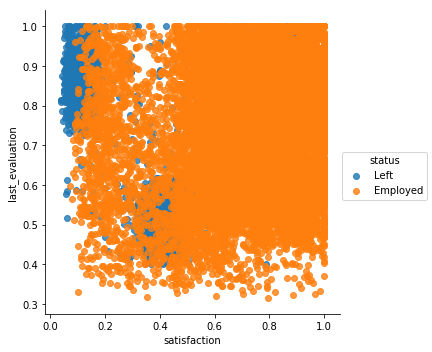

In [30]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=dataset, fit_reg=False)

This is a bivariate segmentation because we are plotting the relationship between two variables while segmenting classes using color.
- It's a quick way to see if there are potential interactions between different features.

**We can't see our 'Left' points well, lets do another lmplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code>, but only for employees who have <code style="color:crimson">'Left'</code>.**

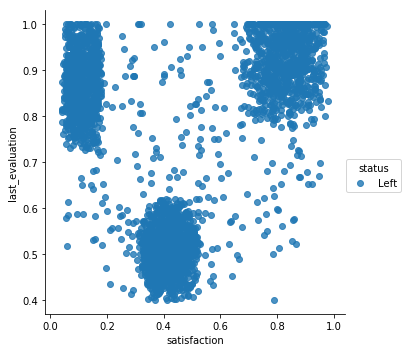

In [32]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
data_alt = dataset[dataset['status'] == 'Left']
sns.lmplot(x='satisfaction',y='last_evaluation', hue='status', data=data_alt, fit_reg=False)

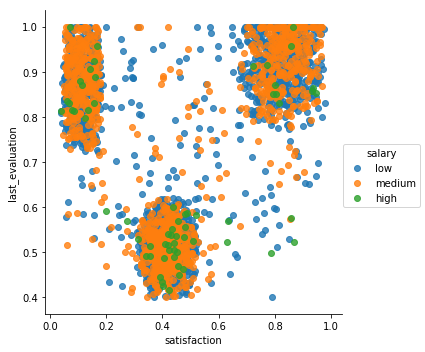

In [34]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
data_alt = dataset[dataset['status'] == 'Left']
sns.lmplot(x='satisfaction',y='last_evaluation', hue='salary', data=data_alt, fit_reg=False)

We can observe three distinct clusters between people who have left, those who had high last evaluations and low satisfaction had medium/high salaries and left. Those who had high levels of satisfaction and last evaluations with low/medium salaries left. While those disgruntled in the middle(moderate last_evaluations and satisfactions0 also left).

Very interesting.

Reminder, essential tasks of exploratory data analysis step:

* Explore the basic information about your dataset.
* Plot distributions of numeric and categorical features.
* Segmented your dataset by <code style="color:steelblue">categorical variables</code> vs. <code style="color:steelblue">numerical variables</code>
* If target variable is categorical, do bivariate segmentations.
